# Import

In [1]:
# !pip install pycaret
# !pip install shap

     |████████████████████████████████| 261 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 243 kB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 17.4 MB/s eta 0:00:01
     |████████████████████████████████| 6.8 MB 26.4 MB/s eta 0:00:01
     |████████████████████████████████| 14.2 MB 93.1 MB/s eta 0:00:01
     |████████████████████████████████| 636 kB 141.3 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 4.8 MB/s  eta 0:00:01
     |████████████████████████████████| 14.8 MB 52.1 MB/s eta 0:00:01
     |████████████████████████████████| 2.0 MB 23.3 MB/s eta 0:00:01
     |████████████████████████████████| 101 kB 23.0 MB/s eta 0:00:01
     |████████████████████████████████| 23.9 MB 108.7 MB/s eta 0:00:01
     |████████████████████████████████| 81 kB 21.0 MB/s eta 0:00:01
     |████████████████████████████████| 206 kB 24.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.7 MB 128.0 MB/s eta 0:00:01
  Installing build dependencies

     |████████████████████████████████| 56 kB 9.3 MB/s  eta 0:00:01
     |████████████████████████████████| 184 kB 98.0 MB/s eta 0:00:01
     |████████████████████████████████| 9.8 MB 21.7 MB/s eta 0:00:01
     |████████████████████████████████| 126 kB 125.9 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 99.3 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 24.7 MB/s eta 0:00:01
     |████████████████████████████████| 295 kB 51.1 MB/s eta 0:00:01
     |████████████████████████████████| 63 kB 1.7 MB/s s eta 0:00:01
     |████████████████████████████████| 75 kB 9.4 MB/s s eta 0:00:01
     |████████████████████████████████| 61 kB 16.6 MB/s eta 0:00:01


  Created wheel for pyod: filename=pyod-0.8.7-py3-none-any.whl size=115977 sha256=a651ba760de8ca478a97d1715dae828038562c13532adf7a0bb8f384836b6154
  Stored in directory: /home/honda/.cache/pip/wheels/b2/ef/b6/3375e239feb7768b5fc35846a0cc22e04312b7c813de07c4dc
  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=67921 sha256=54cf8ea9d34e12e22ab4ea65036b709a53e421cf471c64af4131eb57214a184c
  Stored in directory: /home/honda/.cache/pip/wheels/e1/27/13/3fe67fa7ea7be444b831d117220b3b586b872c9acd4df480d0
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136870 sha256=12e81d71aa0e2a7894f46ba2d07d47dd9c5e06da78c664b3fb3756fe163de319
  Stored in directory: /home/honda/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
  Created wheel for umap-learn: filename=umap_learn-0.5.1-py3-none-any.whl size=76566 sha256=6b5db5e4fe05bf7c71d37488590c9a9b37ea9ddf5016fb5e385d089153549044
  Stored in directory: /home/honda/.cach

  Created wheel for shap: filename=shap-0.39.0-cp37-cp37m-linux_x86_64.whl size=494244 sha256=7b65dd3452035291a3362bf871d3cf93ea891965d9a6d1999f96e9890f44f563
  Stored in directory: /home/honda/.cache/pip/wheels/ca/25/8f/6ae5df62c32651cd719e972e738a8aaa4a87414c4d2b14c9c0
Successfully built shap


In [4]:
import os, sys, random
import numpy as np
import pandas as pd

from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
#warnings.filterwarnings('default')

# 可視化ライブラリ
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
sns.set()
%matplotlib inline

# 評価算出
from sklearn.metrics import f1_score

# from google.colab import drive
# from google.colab import files
# import os
# drive.mount('/content/drive')
# os.chdir('/content/drive/My Drive/SIGNATE/楽曲ジャンル推定/')
# os.getcwd()

datapath = "Data/"
savepath="Model/Model_002/"
submitcsv = 'Submit/submit_003.csv'

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# データ読み込み

In [6]:
#　読み込み
df_train = pd.read_csv(datapath+"train.csv")
df_test = pd.read_csv(datapath+"test.csv")
# df_train = pd.read_csv("train.csv")
# df_test = pd.read_csv("test.csv")
display(df_train)

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,10,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,4041,10,38,246309,0.128795,0.329718,0.575830,-5.252543,0.509531,0.193781,0.187331,0.158197,121-152,region_P
4042,4042,5,23,208734,0.778732,0.228757,0.394283,-14.225700,0.322871,0.253108,0.141218,0.295608,121-152,region_D
4043,4043,10,30,407016,0.402050,0.462374,0.672265,-10.711253,0.646571,0.228189,0.152270,0.163483,97-120,region_E
4044,4044,10,25,204957,0.208096,0.465511,0.523514,-7.855946,0.508910,0.247820,0.202238,0.210184,77-96,region_R


# tSNE

In [7]:
from sklearn.manifold import TSNE

X, y = df_train.drop("genre", axis=1), df_train["genre"]
display(X)
display(y)

X, y = X.values, y.values

print(X)
print(y)

tsne = TSNE(n_components=2, random_state=41)
X_reduced = tsne.fit_transform(X)

plt.figure(figsize=(13, 7))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y, cmap='jet',
            s=15, alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,3,45,301092,0.165667,0.245533,0.356578,-5.088788,0.868704,0.377025,0.226677,0.175399,177-192,region_C
4,4,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,4041,38,246309,0.128795,0.329718,0.575830,-5.252543,0.509531,0.193781,0.187331,0.158197,121-152,region_P
4042,4042,23,208734,0.778732,0.228757,0.394283,-14.225700,0.322871,0.253108,0.141218,0.295608,121-152,region_D
4043,4043,30,407016,0.402050,0.462374,0.672265,-10.711253,0.646571,0.228189,0.152270,0.163483,97-120,region_E
4044,4044,25,204957,0.208096,0.465511,0.523514,-7.855946,0.508910,0.247820,0.202238,0.210184,77-96,region_R


0       10
1        8
2        3
3       10
4        3
        ..
4041    10
4042     5
4043    10
4044    10
4045     3
Name: genre, Length: 4046, dtype: int64

[[0 11 201094 ... 0.8888840711893511 '121-152' 'region_H']
 [1 69 308493 ... 0.1239104191277347 '153-176' 'region_I']
 [2 43 197225 ... 0.166469924386727 '64-76' 'region_E']
 ...
 [4043 30 407016 ... 0.1634829507037631 '97-120' 'region_E']
 [4044 25 204957 ... 0.2101840218009898 '77-96' 'region_R']
 [4045 38 185527 ... 0.1583857446488931 '97-120' 'region_E']]
[10  8  3 ... 10 10  3]


ValueError: could not convert string to float: '121-152'

# ジャンル8,10を半減

In [8]:
def cut_genre_len(df, genre_nun):
  df_ind = df[df['genre']==genre_nun].sample(frac=1, random_state=0).index
  df_ind = df_ind[:int(len(df_ind)/2)]
  df.drop(df.index[df_ind], inplace=True)
  df.reset_index(inplace=True, drop=True)
  return df

In [9]:
cut_genre_len(df_train, 8)
cut_genre_len(df_train, 10)

,index,genre,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region
0,0,10,11,201094,0.112811,0.157247,0.187841,-1.884852,0.893918,0.363568,0.390108,0.888884,121-152,region_H
1,1,8,69,308493,0.101333,0.346563,0.554444,-5.546495,0.874409,0.193892,0.161497,0.123910,153-176,region_I
2,2,3,43,197225,0.496420,0.265391,0.457642,-9.255670,0.439933,0.217146,0.369057,0.166470,64-76,region_E
3,4,3,57,277348,0.190720,0.777578,0.830479,-3.933896,0.650149,0.169323,0.222488,0.226030,97-120,unknown
4,6,10,31,218589,0.254065,0.794563,0.489803,-1.681586,0.703885,0.130464,0.217456,0.128179,77-96,region_N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2721,4038,7,50,287682,0.766699,0.019794,0.267809,-13.435984,0.247339,0.239206,0.137388,0.155591,97-120,region_B
2722,4040,10,17,219123,0.092855,0.144303,0.298678,-4.833738,0.821060,0.452820,0.156497,0.272721,177-192,region_E
2723,4042,5,23,208734,0.778732,0.228757,0.394283,-14.225700,0.322871,0.253108,0.141218,0.295608,121-152,region_D
2724,4043,10,30,407016,0.402050,0.462374,0.672265,-10.711253,0.646571,0.228189,0.152270,0.163483,97-120,region_E


In [10]:
len(df_train)

2726

# Pycaret

In [11]:
from pycaret.classification import *

# 
exp1 = setup(df_train, target = 'genre', session_id=32, ignore_features=['index'])
exp1

,Description,Value
0,session_id,32
1,Target,genre
2,Target Type,Multiclass
3,Label Encoded,"0: 0, 1: 1, 10: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10"
4,Original Data,"(2726, 14)"
5,Missing Values,True
6,Numeric Features,10
7,Categorical Features,2
8,Ordinal Features,False
9,High Cardinality Features,False


([<pandas.io.formats.style.Styler at 0x7f1d8aa72f50>],
       popularity  duration_ms  acousticness  positiveness  danceability  \
 1034        45.0     134095.0      0.164303      0.487724      0.475246   
 1398        35.0      98077.0      0.270763      0.464025      0.772199   
 1563        37.0     155988.0      0.135729      0.747136      0.749967   
 1241        28.0     148055.0      0.667577      0.795720      0.523557   
 448         15.0     194480.0      0.774322      0.451617      0.610355   
 ...          ...          ...           ...           ...           ...   
 510         40.0     242001.0      0.224169      0.368084      0.376578   
 252         16.0     199002.0      0.217517      0.893389      0.600509   
 2136        41.0     323723.0      0.296769      0.781347      0.716228   
 1334        57.0     256391.0      0.798104      0.211307      0.408095   
 1579        49.0     265159.0      0.184087      0.123711      0.667000   
 
        loudness    energy  liv

In [12]:
# モデルの比較
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
et,Extra Trees Classifier,0.5964,0.8842,0.5129,0.5961,0.5831,0.5065,0.5093,0.1180
gbc,Gradient Boosting Classifier,0.5886,0.8744,0.5026,0.5867,0.5745,0.4971,0.5002,0.7460
lightgbm,Light Gradient Boosting Machine,0.5818,0.8683,0.4658,0.5827,0.5633,0.4845,0.4887,0.1990
rf,Random Forest Classifier,0.5640,0.8683,0.4454,0.5726,0.5384,0.4597,0.4653,0.1270
lda,Linear Discriminant Analysis,0.5220,0.8304,0.4718,0.5191,0.5132,0.4230,0.4252,0.0100
ridge,Ridge Classifier,0.5089,0.0000,0.3303,0.4588,0.4666,0.3876,0.3936,0.0090
dt,Decision Tree Classifier,0.4376,0.6635,0.3785,0.4407,0.4351,0.3260,0.3268,0.0080
nb,Naive Bayes,0.3506,0.6832,0.1665,0.2544,0.2682,0.1544,0.1829,0.0060
ada,Ada Boost Classifier,0.3076,0.5576,0.2111,0.2712,0.2298,0.1256,0.1594,0.0350
lr,Logistic Regression,0.2442,0.5095,0.0909,0.0597,0.0959,0.0000,0.0000,0.1640


ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
                     oob_score=False, random_state=32, verbose=0,
                     warm_start=False)

## LightGBM単体

In [ ]:
# 引数で使用するモデルを指定する
lgbm = create_model('lightgbm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5654,0.8734,0.4138,0.5629,0.5439,0.4631,0.4702
1,0.5654,0.8480,0.4427,0.5719,0.5461,0.4653,0.4690
2,0.5864,0.8824,0.4276,0.5698,0.5646,0.4898,0.4943
3,0.6073,0.8822,0.4726,0.5904,0.5875,0.5192,0.5215
4,0.5183,0.8381,0.4701,0.5344,0.4975,0.4029,0.4084
5,0.6597,0.8939,0.5096,0.6412,0.6347,0.5817,0.5856
6,0.5759,0.8626,0.5455,0.5802,0.5549,0.4743,0.4801
7,0.5340,0.8594,0.3788,0.5090,0.5172,0.4294,0.4308
8,0.6368,0.8850,0.5313,0.6578,0.6295,0.5540,0.5577
9,0.5684,0.8581,0.4656,0.6092,0.5575,0.4650,0.4698


In [ ]:
# チューニング　　第二引数：ランダムグリッドサーチの回数
tuned_lgbm = tune_model(lgbm, n_iter = 50, optimize = 'F1')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.5602,0.8561,0.4956,0.5567,0.5441,0.4588,0.4632
1,0.6126,0.8298,0.5510,0.6003,0.5843,0.5233,0.5277
2,0.6283,0.8939,0.5132,0.6104,0.6006,0.5407,0.5466
3,0.6126,0.8570,0.5493,0.6181,0.6024,0.5272,0.5299
4,0.5183,0.8482,0.4916,0.5366,0.5013,0.4052,0.4087
5,0.5969,0.8665,0.4702,0.5570,0.5679,0.5029,0.5080
6,0.5131,0.8393,0.4868,0.5013,0.4871,0.3982,0.4032
7,0.5445,0.8527,0.4316,0.5457,0.5191,0.4366,0.4417
8,0.6105,0.8843,0.4804,0.6267,0.6031,0.5187,0.5243
9,0.5368,0.8415,0.4554,0.5683,0.5286,0.4296,0.4324


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

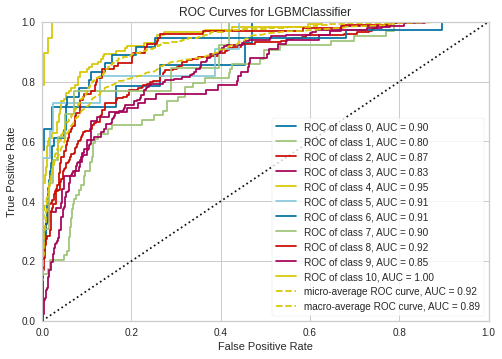

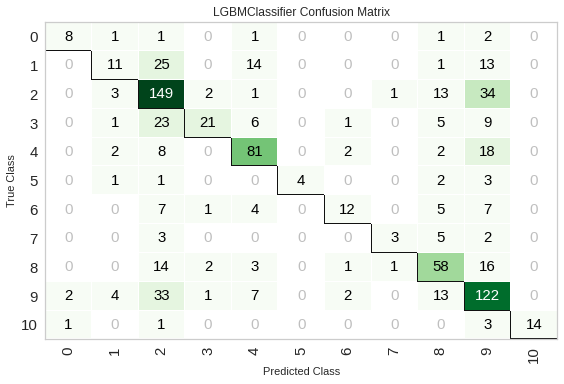

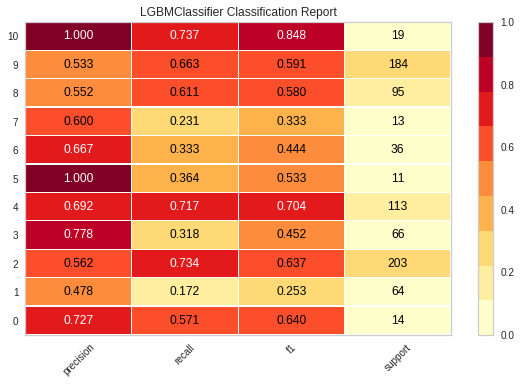

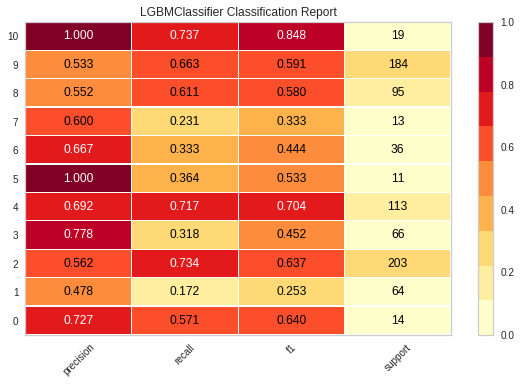

In [ ]:
# 解析結果の確認
evaluate_model(tuned_lgbm)

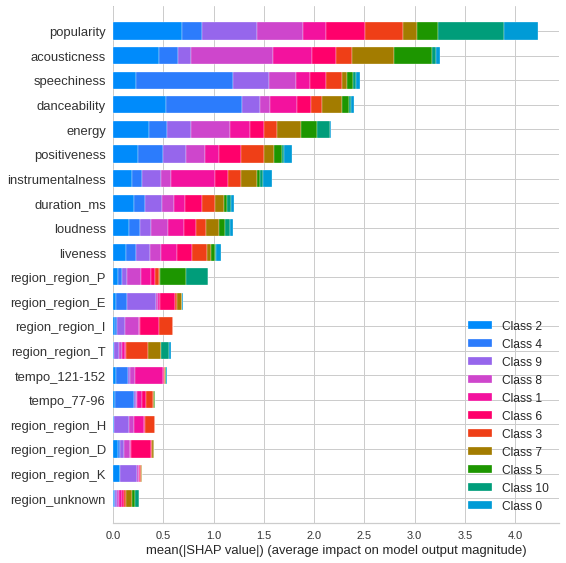

In [ ]:
# SHAP
interpret_model(tuned_lgbm)

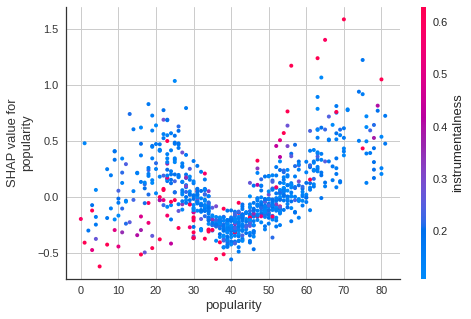

In [ ]:
interpret_model(tuned_lgbm, plot='correlation', observation=320)

In [ ]:
# Validation
# チューニングしたモデルを使用
predict_model(tuned_lgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.5905,0.8783,0.4955,0.6073,0.5745,0.4977,0.5025


,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo_0-40,tempo_121-152,tempo_153-176,tempo_177-192,tempo_193-208,tempo_209-220,tempo_51-56,tempo_57-63,tempo_64-76,tempo_77-96,tempo_97-120,region_region_A,region_region_B,region_region_C,region_region_D,region_region_E,region_region_F,region_region_G,region_region_H,region_region_I,region_region_J,region_region_K,region_region_L,region_region_M,region_region_N,region_region_O,region_region_P,region_region_Q,region_region_R,region_region_S,region_region_T,region_unknown,genre,Label,Score
0,34.0,226733.0,0.162529,0.884212,0.876988,-2.244080,0.845952,0.364012,0.187594,0.136672,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,3,3,0.8964
1,38.0,228643.0,0.665135,0.319327,0.447399,-11.335747,0.235423,0.212940,0.173219,0.212879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3,7,0.9284
2,23.0,355906.0,0.299204,0.632217,0.649004,-9.709639,0.702872,0.164713,0.121118,0.143526,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,10,0.6223
3,31.0,245334.0,0.136184,0.961540,0.569699,-8.308741,0.778949,0.339835,0.201133,0.175924,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,2,0.9330
4,58.0,237265.0,0.183920,0.594438,0.699282,-5.338752,0.702666,0.188504,0.476053,0.149491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3,3,0.9948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
813,46.0,220718.0,0.672170,0.158348,0.377849,-13.535919,0.391382,0.286596,0.119475,0.156124,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8,7,0.8195
814,38.0,274851.0,0.217275,0.341443,0.628920,-9.319245,0.408815,0.427335,0.173016,0.130647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7,5,0.5835
815,50.0,268829.0,0.279631,0.255600,0.604752,-9.707902,0.406646,0.180871,0.118787,0.198835,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,7,0.7137
816,48.0,287891.0,0.839801,0.084519,0.293296,-21.213753,0.154411,0.670175,0.189744,0.181842,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2,7,0.8194


In [ ]:
# テストデータの予測
final_lgbm = finalize_model(tuned_lgbm)
test_predictions = predict_model(final_lgbm, data=df_test)
test_predictions

,index,popularity,duration_ms,acousticness,positiveness,danceability,loudness,energy,liveness,speechiness,instrumentalness,tempo,region,Label,Score
0,4046,43,192465,0.559812,0.565035,0.522237,-12.217087,0.620510,0.389727,0.214989,0.161924,77-96,region_I,8,0.7404
1,4047,40,226536,0.134002,0.542547,0.493128,-2.612846,0.853089,0.163106,0.184183,0.155460,121-152,unknown,10,0.9639
2,4048,58,215385,0.140537,0.643086,0.533189,-3.439684,0.834416,0.429304,0.167352,0.179191,121-152,region_K,8,0.7610
3,4049,49,254494,0.266406,0.456733,0.410583,-10.830424,0.534261,0.151830,0.174403,0.186061,77-96,region_D,8,0.7964
4,4050,50,230934,0.351907,0.526235,0.645625,-9.099337,0.612474,0.319161,0.157594,0.184142,97-120,region_E,8,0.9619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4041,8087,34,366668,0.117208,0.316026,0.502289,-2.909329,0.824708,0.320241,0.206592,0.198859,121-152,region_B,10,0.9796
4042,8088,53,240081,0.225540,0.391226,0.483655,-5.013634,0.630808,0.163884,0.205218,0.179438,121-152,region_I,8,0.9138
4043,8089,48,217839,0.215571,0.828567,0.689747,-8.974036,0.697981,0.318250,0.123748,0.135281,121-152,region_H,1,0.3357
4044,8090,45,249612,0.205074,0.730554,0.580581,-1.915320,0.828423,0.360663,0.165837,0.162821,121-152,region_B,8,0.8711


In [ ]:
# モデルの保存
os.mkdir(savepath)
save_model(final_lgbm, savepath+'LightGBM')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True,
                                       features_todrop=['index'], id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='genre',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.9,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1,

In [ ]:
# # モデルのロード
# tuned_lgbm = load_model(savepath+'LightGBM')

# 提出ファイル作成

In [ ]:
submit = test_predictions[['index', 'Label']]
submit

,index,Label
0,4046,8
1,4047,10
2,4048,8
3,4049,8
4,4050,8
...,...,...
4041,8087,10
4042,8088,8
4043,8089,1
4044,8090,8


In [13]:
submit.to_csv(savepath+submitcsv, header=None,index=False)

NameError: name 'submit' is not defined

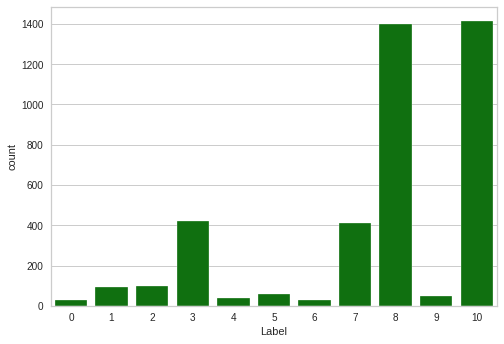

In [ ]:
# テストデータ予測結果確認
sns.countplot(x="Label", data=submit, color='green')